In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## Import the Ames, IA housing dataset

In [5]:
train = pd.read_csv('/gdrive/MyDrive/Coding Temple/7 - Machine Learning Regression/Coding-Temple-M7-Project-Home-Price-Predictions/data/ameshousing.csv')
train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
train.shape

(2930, 82)

Drop the `Order` and `PID` columns because we don't need then for the analysis.

In [7]:
train = train.drop(columns=['Order','PID'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

In [8]:
train_numeric = train.select_dtypes(include=np.number)
train_numeric.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,210,62,0,0,0,0,0,5,2010,215000
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,105000
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,189900


Train categorical columns

In [9]:
train_categorical = train.select_dtypes(exclude=np.number)
train_categorical.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal


In [11]:
train_numeric.isna().sum()

,0
MS SubClass,0
Lot Frontage,490
Lot Area,0
Overall Qual,0
Overall Cond,0
Year Built,0
Year Remod/Add,0
Mas Vnr Area,23
BsmtFin SF 1,1
BsmtFin SF 2,1


Distribution of `SalePrice`

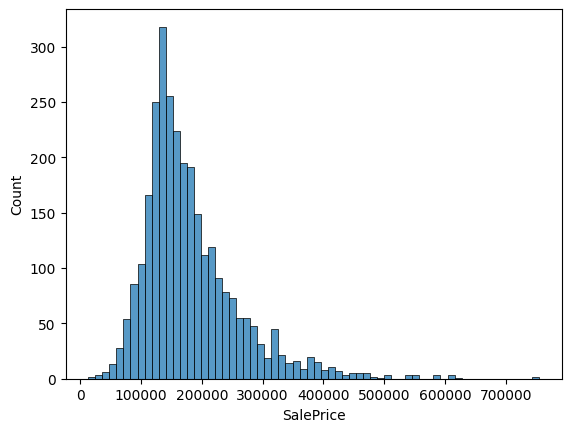

In [13]:
sns.histplot(train['SalePrice'])
plt.show()

In [14]:
train_numeric.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


`Lot Frontage` has a lot of missing values.  How should we best handle this?  Let's get a plot of SalePrice vs. Lot Frontage

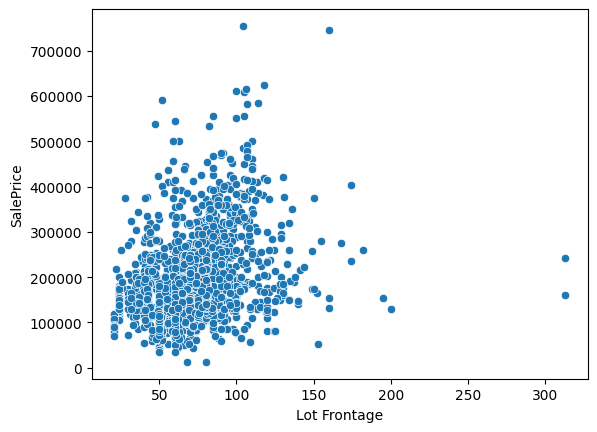

In [15]:
sns.scatterplot(data=train_numeric, x='Lot Frontage', y='SalePrice')
plt.show()

In [16]:
train['Lot Frontage'].mean()

np.float64(69.22459016393442)

Let's look at Lot Frontage vs. Lot Area

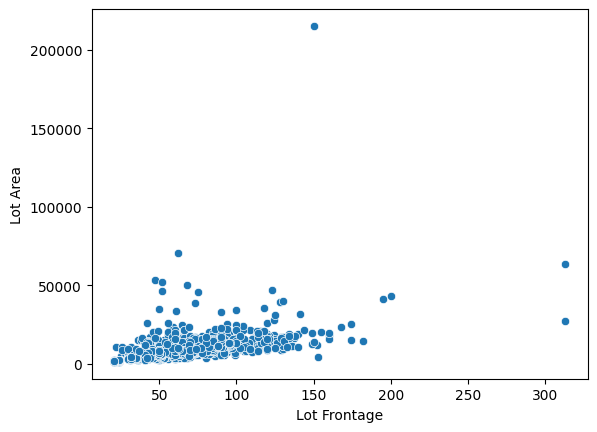

In [17]:
sns.scatterplot(data=train_numeric, x='Lot Frontage', y='Lot Area')
plt.show()

In [18]:
train_numeric['Lot Frontage'].corr(train_numeric['Lot Area'])

np.float64(0.49131335020431033)

So there seems to be a reasonably good correlation between `Lot Frontage` and `Lot Area`. Create a new column to show what percent of lot area is lot frontage per row.

In [19]:
train_numeric['Lot Percentage'] = ((train_numeric['Lot Frontage']) / (train_numeric['Lot Area']))
round(train_numeric['Lot Percentage'].mean(),4)

np.float64(0.0079)

We see that, on average the ratio of lot frontage to lot area is 0.0079.  So we can now replace null values in lot frontage column with this heuristic.  Apply the heuristic to both the train and test datasets.

In [20]:
train_numeric['Lot Frontage'] = train_numeric['Lot Frontage'].fillna((train_numeric['Lot Area']) * 0.0079)
train_numeric = train_numeric.drop(columns=['Lot Percentage'])

Now, let's deal with  the null values within `Mas Vnr Area`.  On closer inspection of the count of unique values, we can see we have a large number of 0 values. Since we have only 22 null values present, it seems reasonable that we can set these to 0 without much issue.


In [21]:
train_numeric['Mas Vnr Area'].value_counts()

,count
Mas Vnr Area,
0.0,1748
120.0,15
176.0,13
200.0,13
180.0,12
...,...
293.0,1
653.0,1
630.0,1


In [22]:
train_numeric['Mas Vnr Area'] = train_numeric['Mas Vnr Area'].fillna(0)

Next we will move on to the last column with a significant amount of missing values: `Garage Yr Blt`

In [23]:
print(train_numeric['Garage Yr Blt'].mean())
print(train_numeric['Garage Yr Blt'].median())

1978.1324431613136
1979.0


Let's insert 1979 into the missing vales of `Garage Yr Blt`

In [24]:
train_numeric['Garage Yr Blt'] = train_numeric['Garage Yr Blt'].fillna(1979)

In [25]:
train_numeric.isna().sum()

,0
MS SubClass,0
Lot Frontage,0
Lot Area,0
Overall Qual,0
Overall Cond,0
Year Built,0
Year Remod/Add,0
Mas Vnr Area,0
BsmtFin SF 1,1
BsmtFin SF 2,1


Since we now have very small numbers of null values, we can consider dropping those rows where any null value resides. It looks like we only lose 3 rows in the `train_numeric` and 0 rows in `test_numeric`.

In [26]:
train_numeric.shape

(2930, 37)

In [27]:
train_numeric = train_numeric.dropna()
train_numeric.shape

(2927, 37)

In [ ]:
# sns.pairplot(train_numeric, corner=True)

Lets generate a heatmap to see the highest correlations with the sales price

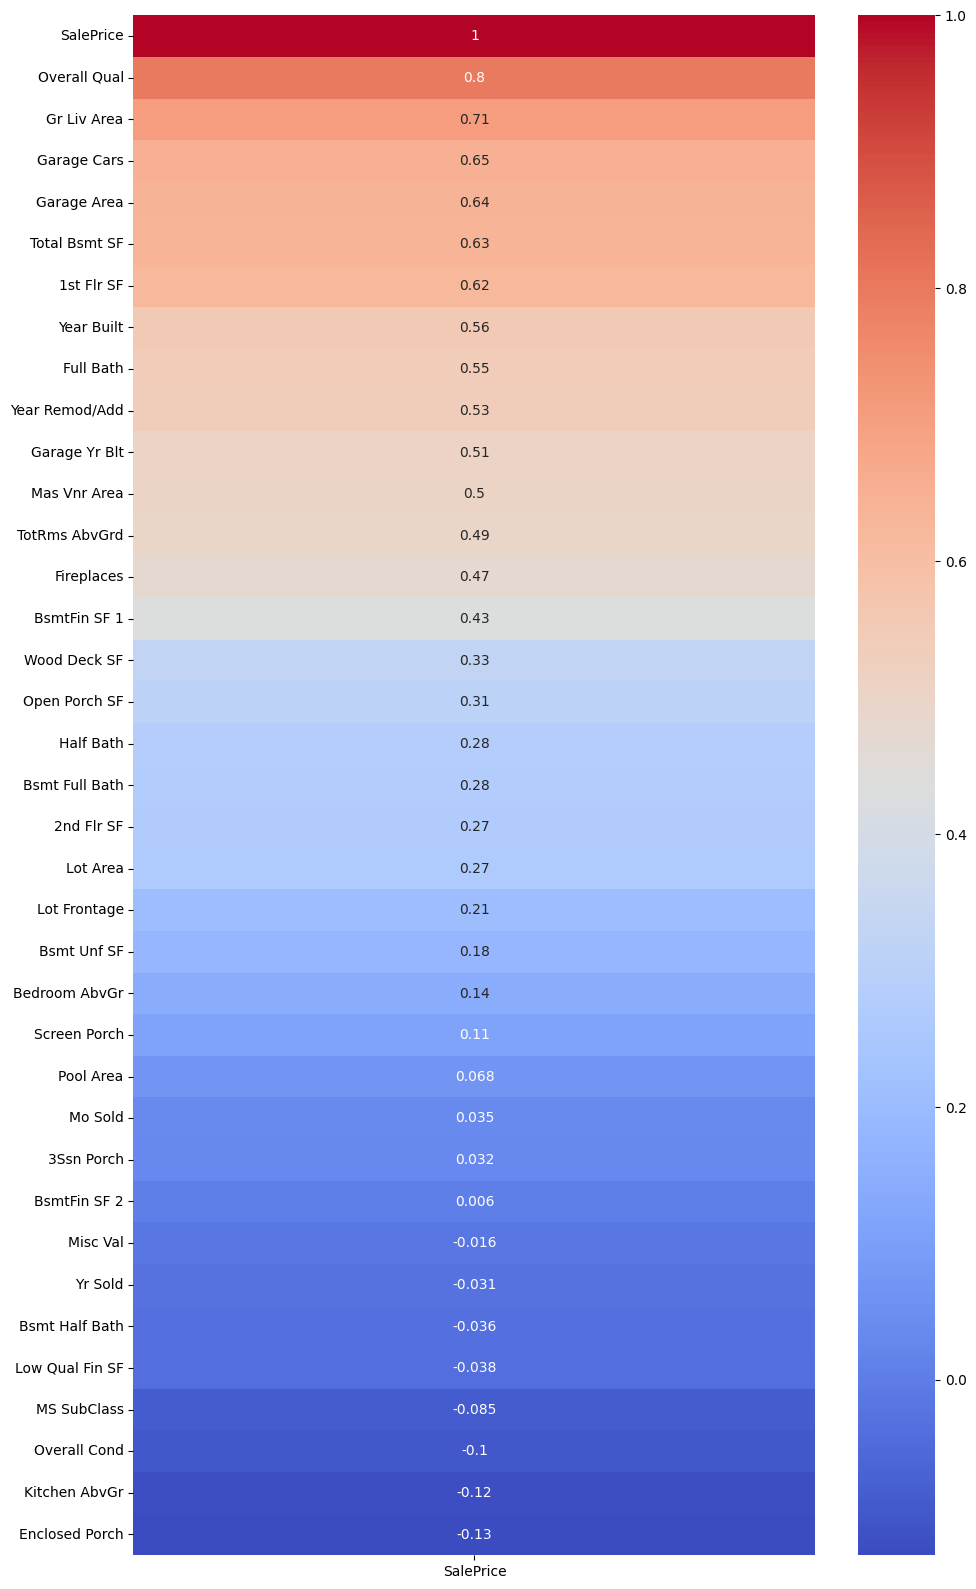

In [28]:
plt.figure(figsize = (11,20))

sns.heatmap(train_numeric.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False),
            annot = True,
            vmax = 1,
            cmap = 'coolwarm');

In [29]:
train_numeric.to_csv('/gdrive/MyDrive/Coding Temple/7 - Machine Learning Regression/Coding-Temple-M7-Project-Home-Price-Predictions/data/train_num_cleaned_v2.csv')


### Now, let's process the categorical columns using one-hot encoding.  We use this instead of `pd.get_dummies` to ensure that both the train and test datasets are encoded in the same manner.

First, we create an instance of `OneHotEncoder`.

In [30]:
encoder = OneHotEncoder(handle_unknown='ignore')

Fit and transform on the train_categorical dataset

In [31]:
train_categorical = encoder.fit_transform(train_categorical)
train_categorical = pd.DataFrame(train_categorical.toarray(), columns=encoder.get_feature_names_out())

  #  # Transform the test data
  #  test_encoded = encoder.transform(test_df[['color']])

  #  # Convert back to dataframes (optional)
  #
  #  test_encoded_df = pd.DataFrame(test_encoded.toarray(), columns=encoder.get_feature_names_out(['color']))

In [ ]:
# train_categorical = pd.get_dummies(train.select_dtypes(include='object'), drop_first=True, dummy_na=True, dtype='float')
# train_categorical.head()

We need to horizontally concatenate the categorical and numeric columns in the dataset.

In [32]:
train_num_cat = pd.concat([train_numeric, train_categorical], axis=1)
train_num_cat.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20.0,141.0,31770.0,6.0,5.0,1960.0,1960.0,112.0,639.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,20.0,93.0,11160.0,7.0,5.0,1968.0,1968.0,0.0,1065.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
train_num_cat.shape

(2930, 320)

Now we can drop any rows that contain nulls in the numeric columns

In [34]:
train_num_cat.dropna(inplace=True)
train_num_cat.shape

(2927, 320)

Write cleaned datasets to disk


In [35]:
train_num_cat.to_csv('/gdrive/MyDrive/Coding Temple/7 - Machine Learning Regression/Coding-Temple-M7-Project-Home-Price-Predictions/data/train_num_cat_cleaned_v2.csv')